<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_04/CAP413_HandsOn_03_Barauna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>

<img src=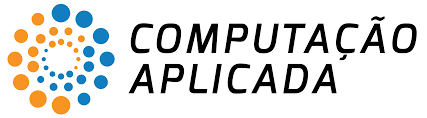 align=”middle”>


# CAP-417-3: Estatística Computacional
## Hands On 03

* Luan Orion Baraúna 

These exercices has proveide for [this](https://youtu.be/AvVZlLCuuXg) class. 



# SAMPLE x POPULATION
- Generate $P$ elements from random integers, choose $S$ elements from this set and do it $n$ times. 
* Calculate the mean and 
* standard deviation 
* view the historigram of the mean. Use 
* BlockSpot. Parameters of the $P$, of the $S$ of the $n$.


First we will analyze how the data behaves for different groups being extracted from the population with a fixed number of people. We will do this analysis for two numbers of groups. Then we will combine different groups.

<img src='https://s3-eu-west-1.amazonaws.com/blog.omniconvert.com-media/blog/wp-content/uploads/2019/10/21150245/sample-size-definition.png'>

## 0 - Import Librarys

In [1]:
#Import Librarys 📚
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from matplotlib.pyplot import figure
import seaborn as sns
from pyparsing.core import ZeroOrMore
from itertools import combinations

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 

In [2]:
# Function which returns subset or r length from n
from itertools import combinations
  
def combination(arr, r):
  
    # return list of all subsets of length r
    # to deal with duplicate subsets use 
    # set(list(combinations(arr, r)))
    return list(combination(arr, r))

def x_fun(tam): return np.arange(0,tam)    

## 1 - Teste for 100 data Samples

In [4]:
#FUNÇÃO COM O CONDICIONAL DE EXCLUSÃO 
#BUSCAR SUBCONJUNTO ATRAVEZ DO ID DO VETOR
#FAZER A ANÁLISE COMBINATÓRIA 

def x_fun(tam): return np.arange(0,tam)
#Generating Data
#Parametes Controls
P,S,n = 10000,100,10
lista, samples = [],[]
#Gerando os P pontos
for i in range(P): lista.append(np.random.randint(0,1000))
aplica = []
#Criando os Subconjuntos
for i in range(n):
  while (len(aplica) < S): #Condição de parada do loop
    num = np.random.choice(lista) #buscando aleatoriamente um numero na lista
    if num not in aplica: aplica.append(num) #Conferindo se aquele número ja foi inserido na lista
  samples.append(aplica) #salvando a lista
  aplica = [] #Limpando ela para a próxima rodada
#Vector in the size of len for scatter plot
x       = x_fun(len(samples[0]))
x_lista = x_fun(len(lista))


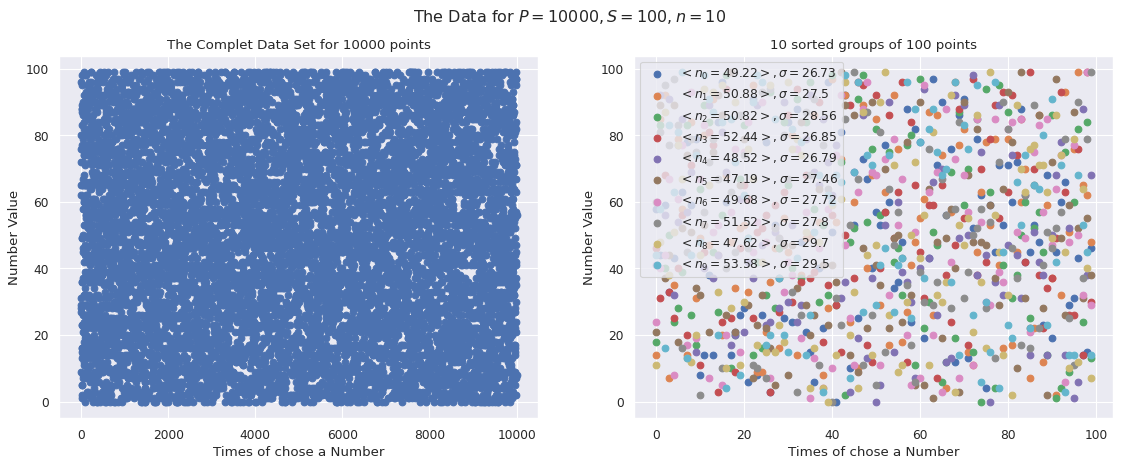

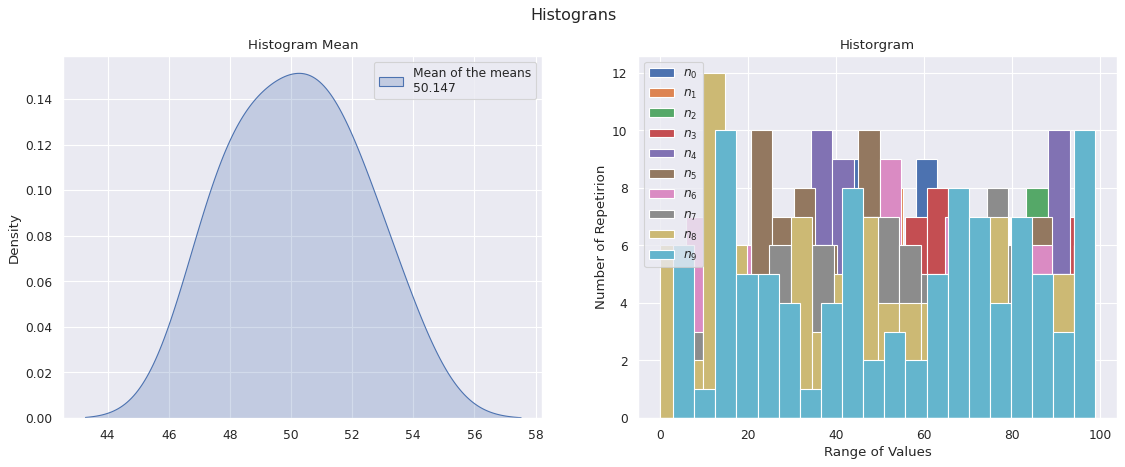

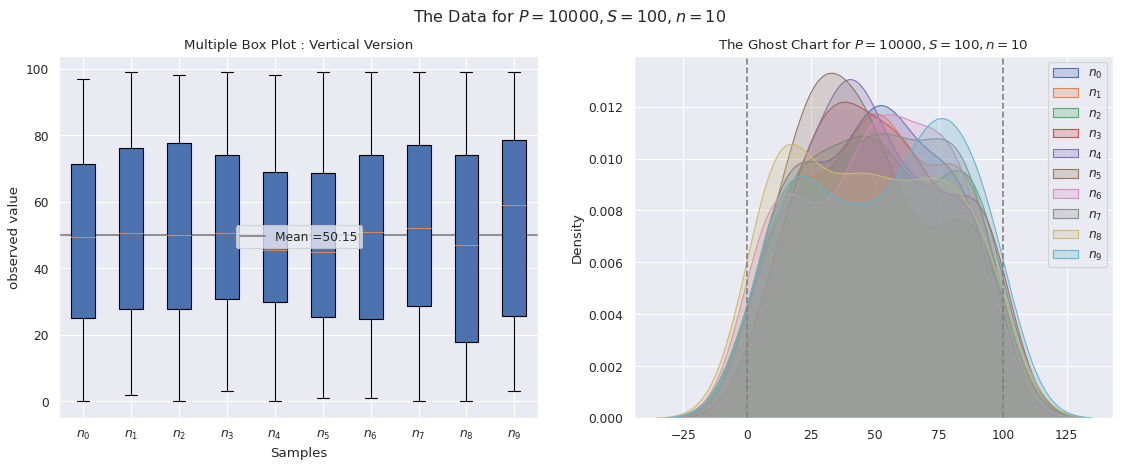

In [ ]:
def x_fun(tam): return np.arange(0,tam)
#Generating Data
#Parametes Controls
P,S,n = 10000,100,10
lista, samples = [],[]
# for i in range(P): lista.append(np.random.randint(0,100))
# aplica = []
# for i in range(n):
#   while (len(aplica) < S):
#     num = np.random.choice(lista)
#     if num not in aplica: aplica.append(num)
#   samples.append(aplica)
#   aplica = []

for i in range(P): lista.append(np.random.randint(0,100))
for i in range(n): samples.append(np.random.choice(lista, S))


#Vector in the size of len for scatter plot
x = x_fun(len(samples[0]))
x_lista = x_fun(len(lista))
# PLOTING ALL DATA CHART 
#Creatin Figure Enveirment
figure(figsize=(17, 6), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')
#First Subplot: All P data
plt.subplot(1,2,1)
plt.scatter(x_lista,lista)
plt.title('The Complet Data Set for '+str(P)+' points')
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
#Second Subplot: S Samples data
plt.subplot(1,2,2)
for i in range(len(samples)): 
  plt.scatter(x,samples[i], label='$<{n}_'+str(i)+'='+str(np.mean(samples[i]))+'>,\sigma='+str(round(np.std(samples[i]),2))+'$')
plt.title(str(n)+' sorted groups of '+str(S)+ ' points')
plt.legend()
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
plt.show()

#PLOTING HISTOGRAM CHARTS
#Creatin Figures
figure(figsize=(17, 6), dpi=80)
plt.suptitle('Histograns')
#First subplot Histogramns Mean
plt.subplot(1,2,1)
hist_mean = []
for i in range(len(samples)):hist_mean.append(np.mean(samples[i]))
fig = sns.kdeplot(hist_mean, shade=True,label='Mean of the means\n'+str(round(np.mean(hist_mean),3)))
plt.title('Histogram Mean')
plt.legend()
#Second subplot All Histogramns
plt.subplot(1,2,2)
for i in range(len(samples)): plt.hist(samples[i], bins=20,label='$n_'+str(i)+'$')
plt.title('Historgram')
plt.legend()
plt.xlabel('Range of Values')
plt.ylabel('Number of Repetirion')
plt.show()

#PLOTING BOXPLOTS AND GAUSSIAN
figure(figsize=(17, 6), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')

all_data = [samples[i] for i in range(len(samples))]
labels = ['$n_'+str(i)+'$' for i in range(len(samples))]
#MultipleBoxplot
plt.subplot(1,2,1)
plt.boxplot(all_data, vert=True, patch_artist=True, labels=labels)
plt.axhline(y=np.mean(hist_mean), color='gray',label='Mean ='+str(round(np.mean(hist_mean),2)),zorder=1)
plt.ylabel('observed value')
plt.xlabel('Samples')
plt.title('Multiple Box Plot : Vertical Version')
plt.legend()
plt.subplot(1,2,2)


for i in range(len(samples)): fig = sns.kdeplot(samples[i], shade=True,label='$n_'+str(i)+'$')
plt.axvline(x=0, color='gray',linestyle='--')
plt.axvline(x=100, color='gray',linestyle='--')
plt.legend()
plt.title('The Ghost Chart for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')

plt.show()


## 2 - Teste for 10 data Samples

In [ ]:
for i in range(P): lista.append(np.random.randint(0,10))
for i in range(n): samples.append(np.random.choice(lista, S))

x = np.linspace(0,len(samples[0]),len(samples[0]))  
x_lista = np.linspace(0,len(lista),len(lista))    

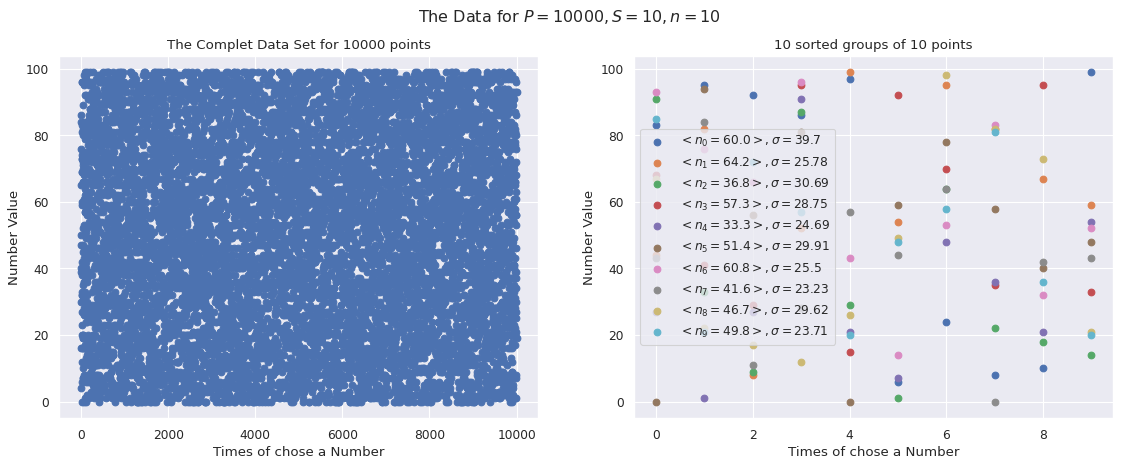

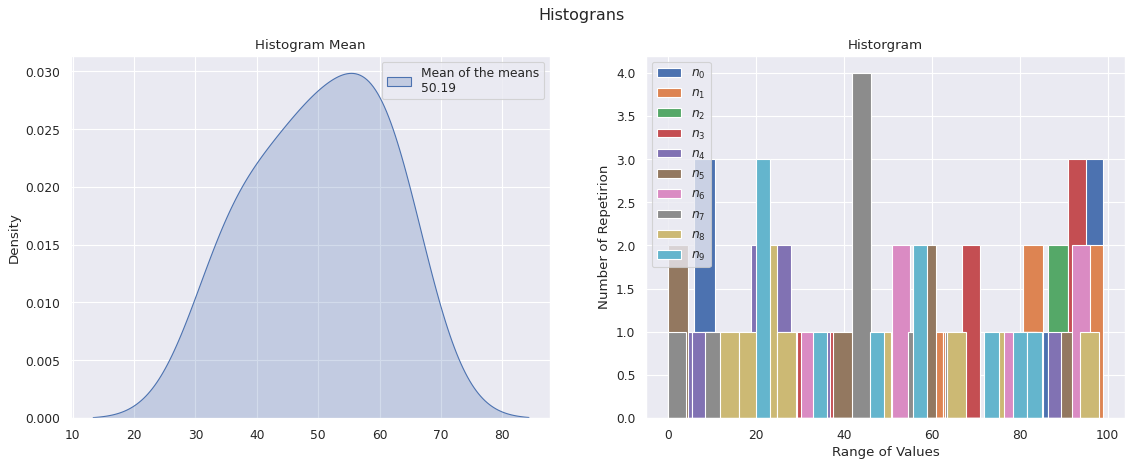

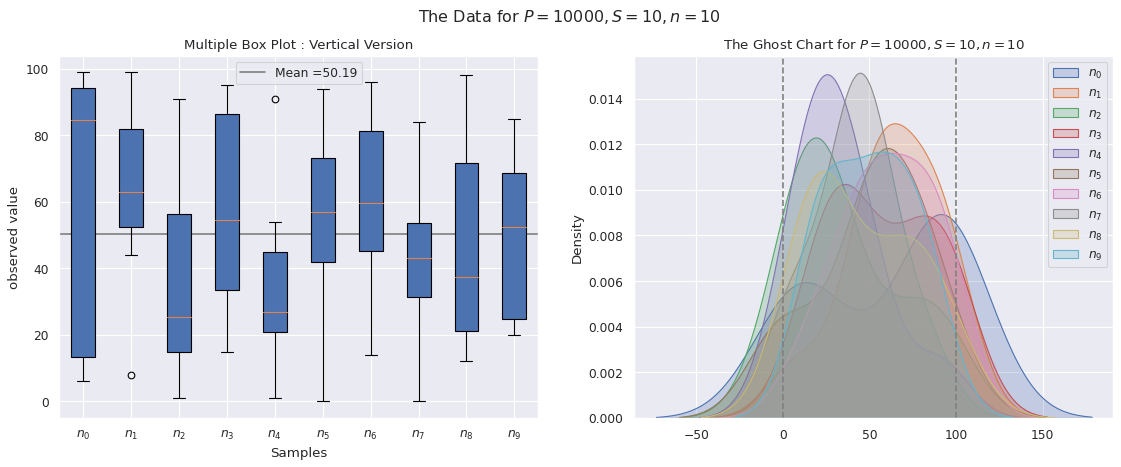

In [ ]:
#Generating Data
#Parametes Controls
P,S,n = 10000,10,10
lista, samples = [],[]
# for i in range(P): lista.append(np.random.randint(0,100))
# aplica = []
# for i in range(n):
#   while (len(aplica) < S):
#     num = np.random.choice(lista)
#     if num not in aplica: aplica.append(num)
#   samples.append(aplica)
#   aplica = []
for i in range(P): lista.append(np.random.randint(0,100))
for i in range(n): samples.append(np.random.choice(lista, S))

#Vector in the size of len for scatter plot
x = x_fun(len(samples[0]))
x_lista = x_fun(len(lista))  

# PLOTING ALL DATA CHART 
#Creatin Figure Enveirment
figure(figsize=(17, 6), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')
#First Subplot: All P data
plt.subplot(1,2,1)
plt.scatter(x_lista,lista)
plt.title('The Complet Data Set for '+str(P)+' points')
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
#Second Subplot: S Samples data
plt.subplot(1,2,2)
for i in range(len(samples)): 
  plt.scatter(x,samples[i], label='$<{n}_'+str(i)+'='+str(np.mean(samples[i]))+'>,\sigma='+str(round(np.std(samples[i]),2))+'$')
plt.title(str(n)+' sorted groups of '+str(S)+ ' points')
plt.legend()
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
plt.show()

#PLOTING HISTOGRAM CHARTS
#Creatin Figures
figure(figsize=(17, 6), dpi=80)
plt.suptitle('Histograns')
#First subplot Histogramns Mean
plt.subplot(1,2,1)
hist_mean = []
for i in range(len(samples)):hist_mean.append(np.mean(samples[i]))
fig = sns.kdeplot(hist_mean, shade=True,label='Mean of the means\n'+str(round(np.mean(hist_mean),3)))
plt.title('Histogram Mean')
plt.legend()
#Second subplot All Histogramns
plt.subplot(1,2,2)
for i in range(len(samples)): plt.hist(samples[i], bins=20,label='$n_'+str(i)+'$')
plt.title('Historgram')
plt.legend()
plt.xlabel('Range of Values')
plt.ylabel('Number of Repetirion')
plt.show()

#PLOTING BOXPLOTS AND GAUSSIAN
figure(figsize=(17, 6), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')

all_data = [samples[i] for i in range(len(samples))]
labels = ['$n_'+str(i)+'$' for i in range(len(samples))]
#MultipleBoxplot
plt.subplot(1,2,1)
plt.boxplot(all_data, vert=True, patch_artist=True, labels=labels)
plt.axhline(y=np.mean(hist_mean), color='gray',label='Mean ='+str(round(np.mean(hist_mean),2)),zorder=1)
plt.ylabel('observed value')
plt.xlabel('Samples')
plt.title('Multiple Box Plot : Vertical Version')
plt.legend()
plt.subplot(1,2,2)


for i in range(len(samples)): fig = sns.kdeplot(samples[i], shade=True,label='$n_'+str(i)+'$')
plt.axvline(x=0, color='gray',linestyle='--')
plt.axvline(x=100, color='gray',linestyle='--')
plt.legend()
plt.title('The Ghost Chart for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')

plt.show()


## 3 - Diferent Samples Values

In [ ]:
#Generating Data
#Parametes Controls
P,S,n = 10000,100,10
lista, samples = [],[]
# for i in range(P): lista.append(np.random.randint(0,100))
# aplica = []
# for i in range(n):
#   while (len(aplica) < S):
#     num = np.random.choice(lista)
#     if num not in aplica: aplica.append(num)
#   samples.append(aplica)
#   aplica = []
for i in range(P): lista.append(np.random.randint(0,100))
samples.append(np.random.choice(lista, 100))
samples.append(np.random.choice(lista, 80))
samples.append(np.random.choice(lista, 60))
samples.append(np.random.choice(lista, 40))
samples.append(np.random.choice(lista, 20))
samples.append(np.random.choice(lista, 10))


#Vector in the size of len for scatter plot
x = x_fun(len(samples[0]))
x_lista = x_fun(len(lista))  

# PLOTING ALL DATA CHART 
#Creatin Figure Enveirment
figure(figsize=(17, 6), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(len(samples))+'$')
#First Subplot: All P data
plt.subplot(1,2,1)
plt.scatter(x_lista,lista)
plt.title('The Complet Data Set for '+str(P)+' points')
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
#Second Subplot: S Samples data
plt.subplot(1,2,2)
for i in range(len(samples)): 
  plt.scatter(x_fun(len(samples[i])),samples[i], label='$<{n}_'+str(i)+'='+str(np.mean(samples[i]))+'>,\sigma='+str(round(np.std(samples[i]),2))+'$')
plt.title(str(n)+' sorted groups of '+str(S)+ ' points')
plt.legend()
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
plt.show()

#PLOTING HISTOGRAM CHARTS
#Creatin Figures
figure(figsize=(17, 6), dpi=80)
plt.suptitle('Histograns')
#First subplot Histogramns Mean
plt.subplot(1,2,1)
hist_mean = []
for i in range(len(samples)):hist_mean.append(np.mean(samples[i]))
fig = sns.kdeplot(hist_mean, shade=True,label='Mean of the means\n'+str(round(np.mean(hist_mean),3)))
plt.title('Histogram Mean')
plt.legend()
#Second subplot All Histogramns
plt.subplot(1,2,2)
for i in range(len(samples)): plt.hist(samples[i], bins=20,label='$n_'+str(i)+'$')
plt.title('Historgram')
plt.legend()
plt.xlabel('Range of Values')
plt.ylabel('Number of Repetirion')
plt.show()

#PLOTING BOXPLOTS AND GAUSSIAN
figure(figsize=(17, 6), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')

all_data = [samples[i] for i in range(len(samples))]
labels = ['$n_'+str(i)+'$' for i in range(len(samples))]
#MultipleBoxplot
plt.subplot(1,2,1)
plt.boxplot(all_data, vert=True, patch_artist=True, labels=labels)
plt.axhline(y=np.mean(hist_mean), color='gray',label='Mean ='+str(round(np.mean(hist_mean),2)),zorder=1)
plt.ylabel('observed value')
plt.xlabel('Samples')
plt.title('Multiple Box Plot : Vertical Version')
plt.legend()
plt.subplot(1,2,2)


for i in range(len(samples)): fig = sns.kdeplot(samples[i], shade=True,label='$n_'+str(i)+'$')
plt.axvline(x=0, color='gray',linestyle='--')
plt.axvline(x=100, color='gray',linestyle='--')
plt.legend()
plt.title('The Ghost Chart for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')

plt.show()


## 4 - Assuming a Gaussian Distributions



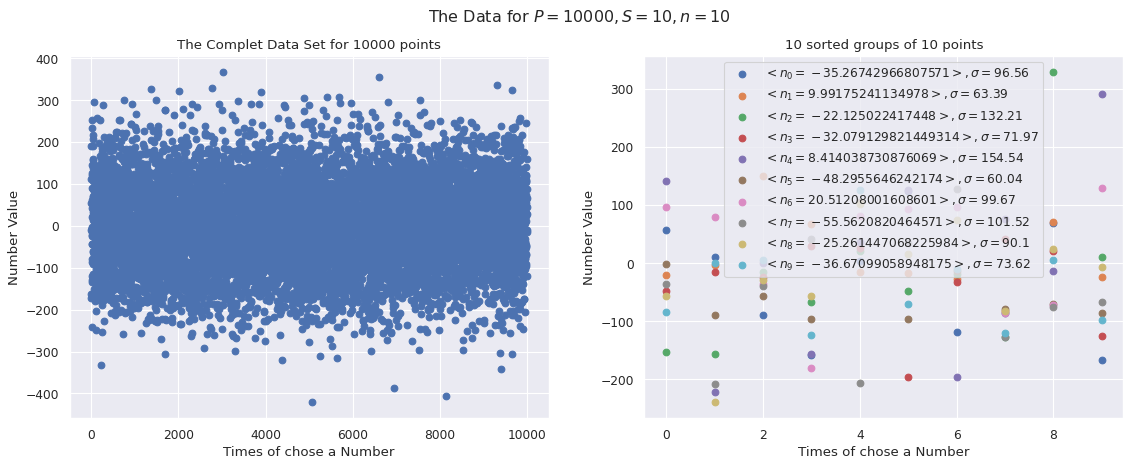

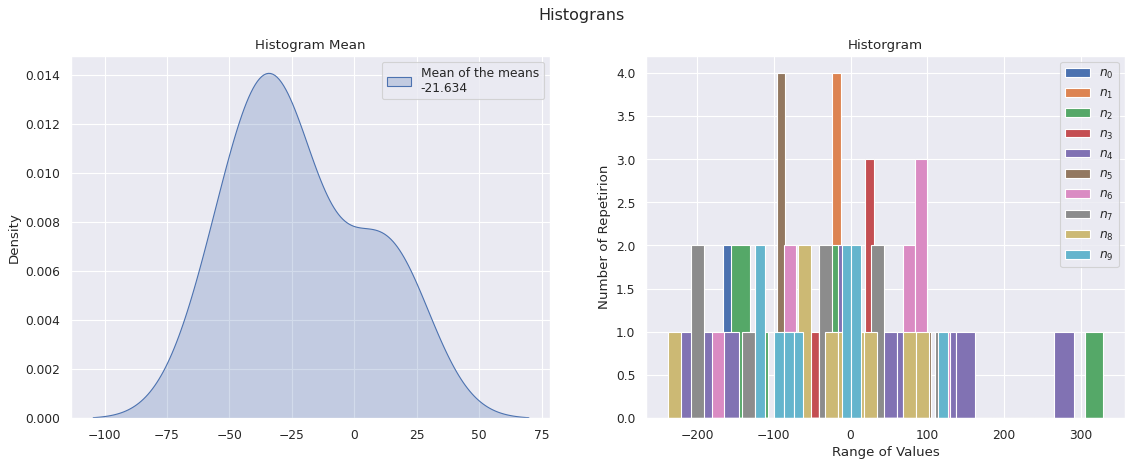

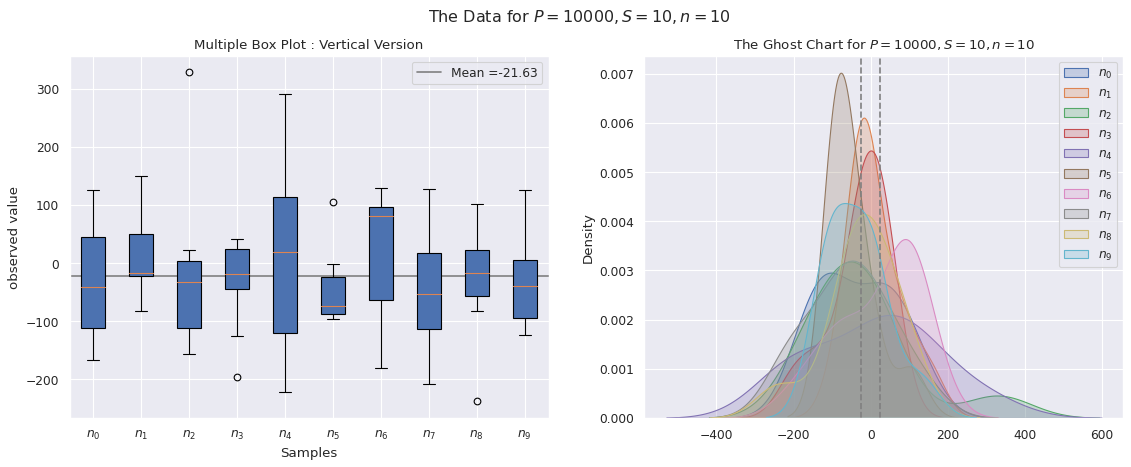

In [ ]:
#Generating Data
#Parametes Controls
P,S,n = 10000,10,10
lista, samples = [],[]
# for i in range(P): lista.append(np.random.randint(0,100))
# aplica = []
# for i in range(n):
#   while (len(aplica) < S):
#     num = np.random.choice(lista)
#     if num not in aplica: aplica.append(num)
#   samples.append(aplica)
#   aplica = []
for i in range(P): lista.append(np.random.normal(0,100))
for i in range(n): samples.append(np.random.choice(lista, S))

#Vector in the size of len for scatter plot
x = x_fun(len(samples[0]))
x_lista = x_fun(len(lista))  

# PLOTING ALL DATA CHART 
#Creatin Figure Enveirment
figure(figsize=(17, 6), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')
#First Subplot: All P data
plt.subplot(1,2,1)
plt.scatter(x_lista,lista)
plt.title('The Complet Data Set for '+str(P)+' points')
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
#Second Subplot: S Samples data
plt.subplot(1,2,2)
for i in range(len(samples)): 
  plt.scatter(x,samples[i], label='$<{n}_'+str(i)+'='+str(np.mean(samples[i]))+'>,\sigma='+str(round(np.std(samples[i]),2))+'$')
plt.title(str(n)+' sorted groups of '+str(S)+ ' points')
plt.legend()
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
plt.show()

#PLOTING HISTOGRAM CHARTS
#Creatin Figures
figure(figsize=(17, 6), dpi=80)
plt.suptitle('Histograns')
#First subplot Histogramns Mean
plt.subplot(1,2,1)
hist_mean = []
for i in range(len(samples)):hist_mean.append(np.mean(samples[i]))
fig = sns.kdeplot(hist_mean, shade=True,label='Mean of the means\n'+str(round(np.mean(hist_mean),3)))
plt.title('Histogram Mean')
plt.legend()
#Second subplot All Histogramns
plt.subplot(1,2,2)
for i in range(len(samples)): plt.hist(samples[i], bins=20,label='$n_'+str(i)+'$')
plt.title('Historgram')
plt.legend()
plt.xlabel('Range of Values')
plt.ylabel('Number of Repetirion')
plt.show()

#PLOTING BOXPLOTS AND GAUSSIAN
figure(figsize=(17, 6), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')

all_data = [samples[i] for i in range(len(samples))]
labels = ['$n_'+str(i)+'$' for i in range(len(samples))]
#MultipleBoxplot
plt.subplot(1,2,1)
plt.boxplot(all_data, vert=True, patch_artist=True, labels=labels)
plt.axhline(y=np.mean(hist_mean), color='gray',label='Mean ='+str(round(np.mean(hist_mean),2)),zorder=1)
plt.ylabel('observed value')
plt.xlabel('Samples')
plt.title('Multiple Box Plot : Vertical Version')
plt.legend()
plt.subplot(1,2,2)


for i in range(len(samples)): fig = sns.kdeplot(samples[i], shade=True,label='$n_'+str(i)+'$')
#plt.axvline(x=-np.std(hist_mean), color='gray',linestyle='--')
#plt.axvline(x=np.std(hist_mean), color='gray',linestyle='--')
plt.legend()
plt.title('The Ghost Chart for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')

plt.show()


1000

array([0, 1, 2, 3])

TypeError: ignored

In [8]:
samples = []
samples.append(np.random.choice(lista, 100))
samples.append(np.random.choice(lista, 80))
samples.append(np.random.choice(lista, 60))
samples.append(np.random.choice(lista, 40))
samples.append(np.random.choice(lista, 20))
samples.append(np.random.choice(lista, 10))


In [9]:
len(samples)

6

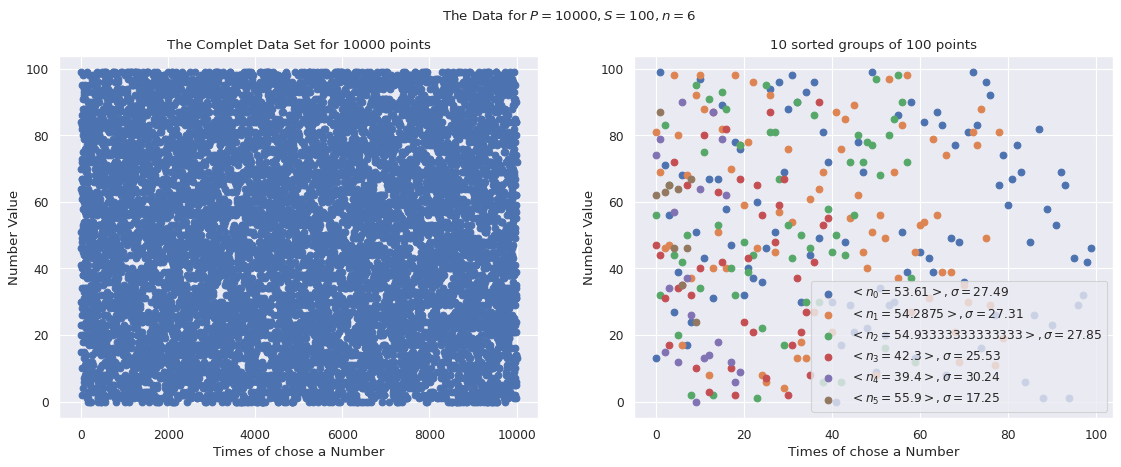

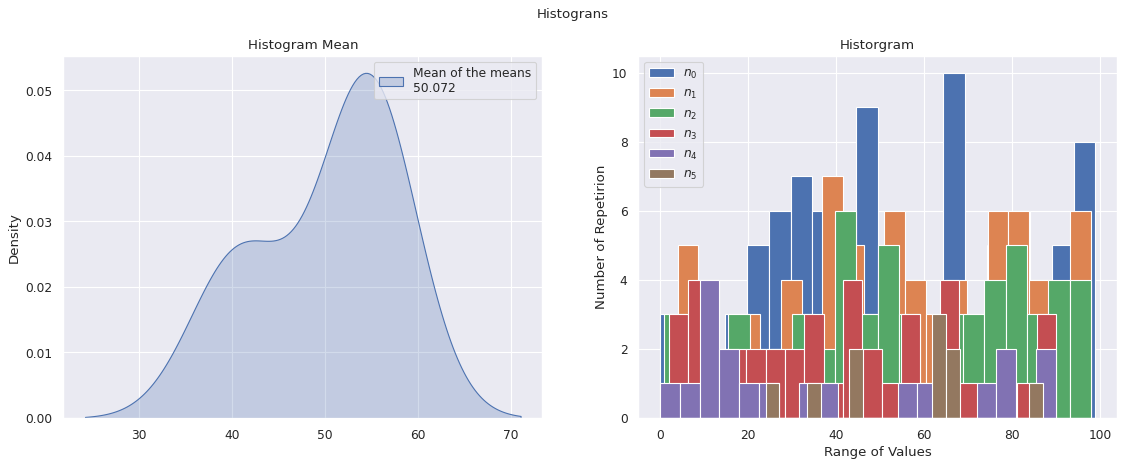

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


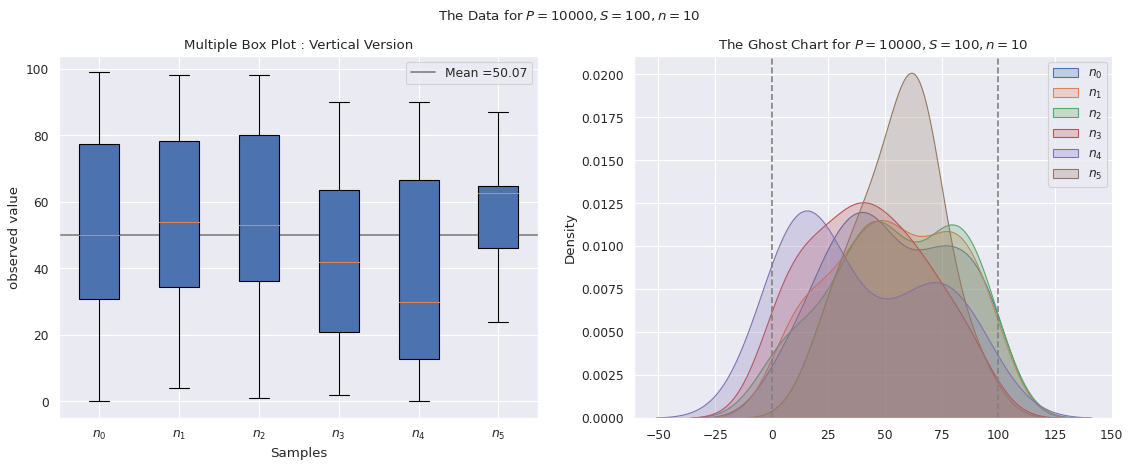

In [16]:
#Generating Data
#Parametes Controls
P,S,n = 10000,100,10
lista, samples = [],[]
# for i in range(P): lista.append(np.random.randint(0,100))
# aplica = []
# for i in range(n):
#   while (len(aplica) < S):
#     num = np.random.choice(lista)
#     if num not in aplica: aplica.append(num)
#   samples.append(aplica)
#   aplica = []
for i in range(P): lista.append(np.random.randint(0,100))
samples.append(np.random.choice(lista, 100))
samples.append(np.random.choice(lista, 80))
samples.append(np.random.choice(lista, 60))
samples.append(np.random.choice(lista, 40))
samples.append(np.random.choice(lista, 20))
samples.append(np.random.choice(lista, 10))


#Vector in the size of len for scatter plot
x = x_fun(len(samples[0]))
x_lista = x_fun(len(lista))  

# PLOTING ALL DATA CHART 
#Creatin Figure Enveirment
figure(figsize=(17, 6), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(len(samples))+'$')
#First Subplot: All P data
plt.subplot(1,2,1)
plt.scatter(x_lista,lista)
plt.title('The Complet Data Set for '+str(P)+' points')
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
#Second Subplot: S Samples data
plt.subplot(1,2,2)
for i in range(len(samples)): 
  plt.scatter(x_fun(len(samples[i])),samples[i], label='$<{n}_'+str(i)+'='+str(np.mean(samples[i]))+'>,\sigma='+str(round(np.std(samples[i]),2))+'$')
plt.title(str(n)+' sorted groups of '+str(S)+ ' points')
plt.legend()
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
plt.show()

#PLOTING HISTOGRAM CHARTS
#Creatin Figures
figure(figsize=(17, 6), dpi=80)
plt.suptitle('Histograns')
#First subplot Histogramns Mean
plt.subplot(1,2,1)
hist_mean = []
for i in range(len(samples)):hist_mean.append(np.mean(samples[i]))
fig = sns.kdeplot(hist_mean, shade=True,label='Mean of the means\n'+str(round(np.mean(hist_mean),3)))
plt.title('Histogram Mean')
plt.legend()
#Second subplot All Histogramns
plt.subplot(1,2,2)
for i in range(len(samples)): plt.hist(samples[i], bins=20,label='$n_'+str(i)+'$')
plt.title('Historgram')
plt.legend()
plt.xlabel('Range of Values')
plt.ylabel('Number of Repetirion')
plt.show()

#PLOTING BOXPLOTS AND GAUSSIAN
figure(figsize=(17, 6), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')

all_data = [samples[i] for i in range(len(samples))]
labels = ['$n_'+str(i)+'$' for i in range(len(samples))]
#MultipleBoxplot
plt.subplot(1,2,1)
plt.boxplot(all_data, vert=True, patch_artist=True, labels=labels)
plt.axhline(y=np.mean(hist_mean), color='gray',label='Mean ='+str(round(np.mean(hist_mean),2)),zorder=1)
plt.ylabel('observed value')
plt.xlabel('Samples')
plt.title('Multiple Box Plot : Vertical Version')
plt.legend()
plt.subplot(1,2,2)


for i in range(len(samples)): fig = sns.kdeplot(samples[i], shade=True,label='$n_'+str(i)+'$')
plt.axvline(x=0, color='gray',linestyle='--')
plt.axvline(x=100, color='gray',linestyle='--')
plt.legend()
plt.title('The Ghost Chart for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')

plt.show()


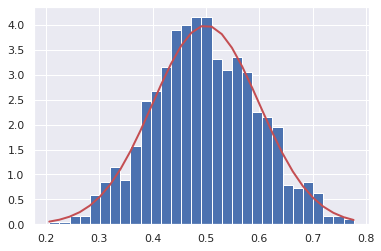

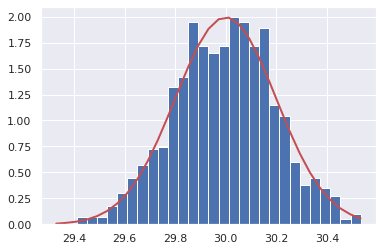

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(population, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

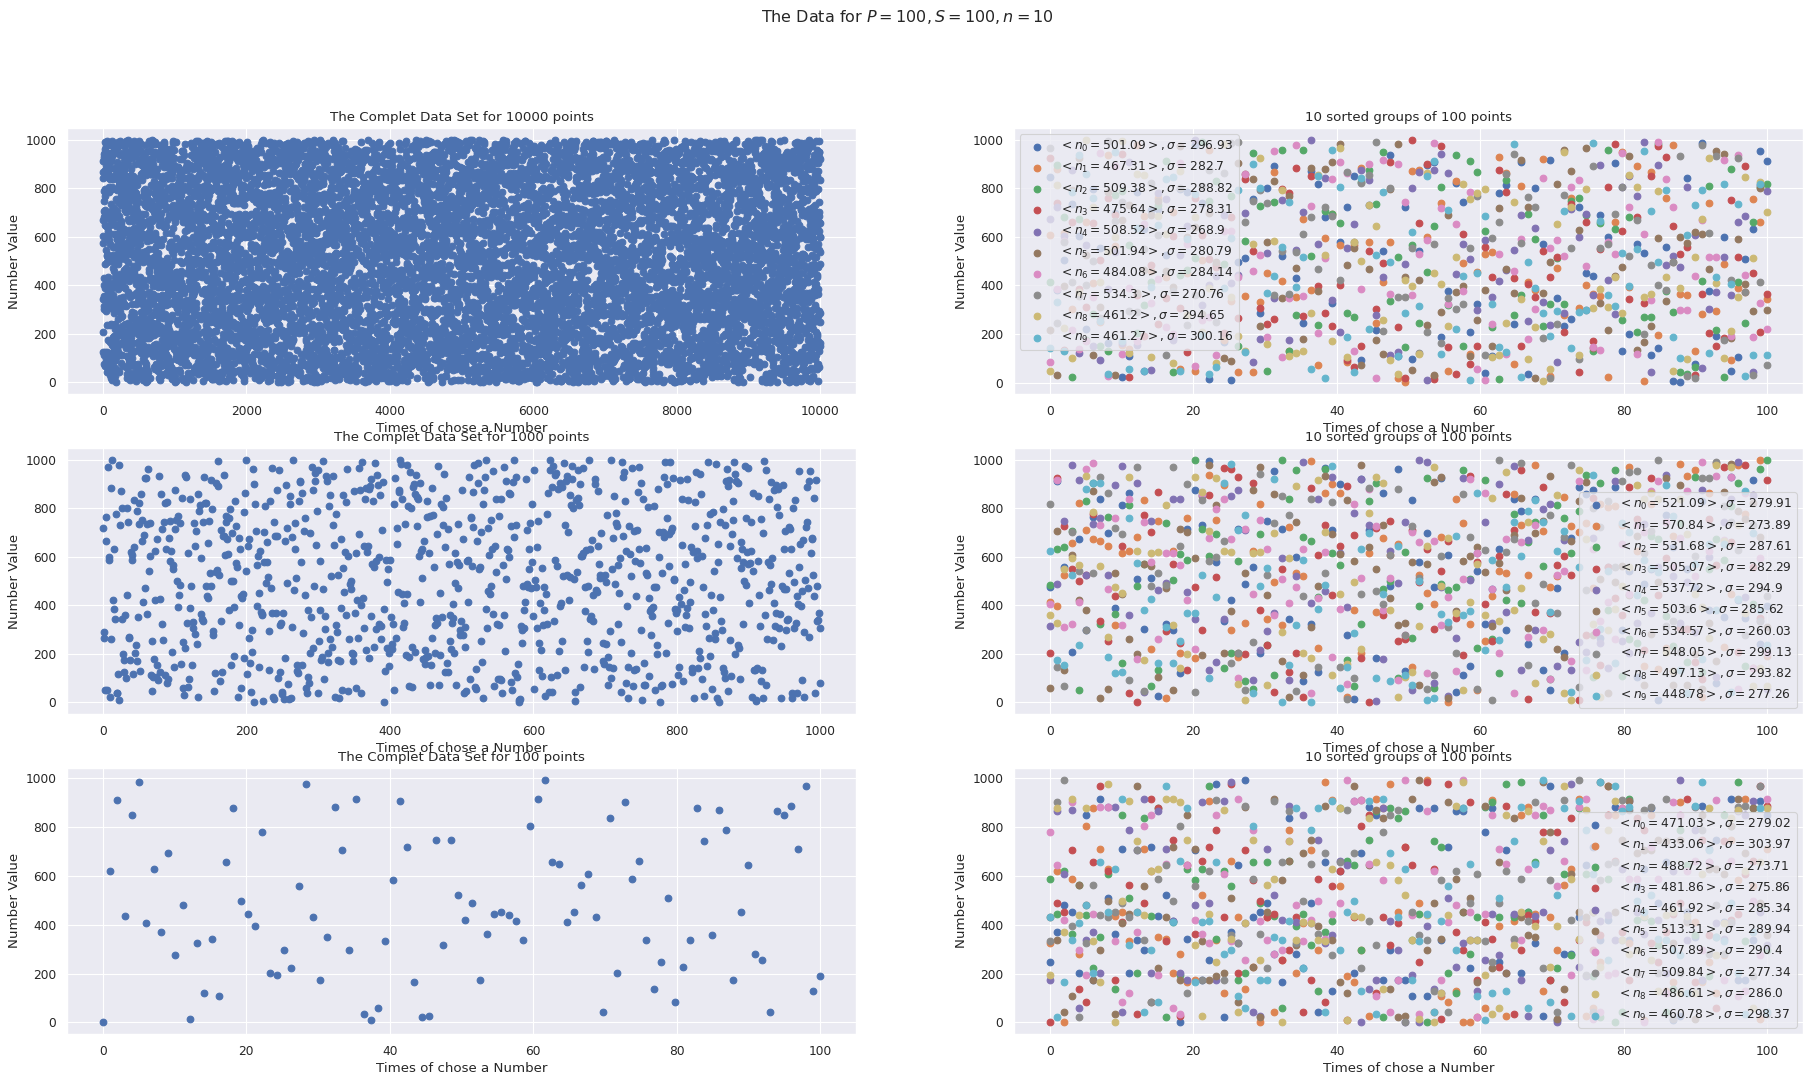

In [ ]:
#########################################################
################## PRIMEIRO #############################
#########################################################


P,S,n = 10000,100,10
lista, samples = [],[]
for i in range(P): lista.append(np.random.randint(0,1000))
for i in range(n): samples.append(np.random.choice(lista, S))
#Vector in the size of len for scatter plot
x = np.linspace(0,len(samples[0]),len(samples[0]))  
x_lista = np.linspace(0,len(lista),len(lista))    


# PLOTING ALL DATA CHART 
#Creatin Figure Enveirment
figure(figsize=(28, 15), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')
#First Subplot: All P data
plt.subplot(3,2,1)
plt.scatter(x_lista,lista)
plt.title('The Complet Data Set for '+str(P)+' points')
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
#Second Subplot: S Samples data
plt.subplot(3,2,2)
for i in range(len(samples)): 
  plt.scatter(x,samples[i], label='$<{n}_'+str(i)+'='+str(np.mean(samples[i]))+'>,\sigma='+str(round(np.std(samples[i]),2))+'$')
plt.title(str(n)+' sorted groups of '+str(S)+ ' points')
plt.legend()
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')


#########################################################
################## SEGUNDO ##############################
#########################################################


P,S,n = 1000,100,10
lista, samples = [],[]
for i in range(P): lista.append(np.random.randint(0,1000))
for i in range(n): samples.append(np.random.choice(lista, S))
#Vector in the size of len for scatter plot
x = np.linspace(0,len(samples[0]),len(samples[0]))  
x_lista = np.linspace(0,len(lista),len(lista))    


# PLOTING ALL DATA CHART 
#Creatin Figure Enveirment
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')
#First Subplot: All P data
plt.subplot(3,2,3)
plt.scatter(x_lista,lista)
plt.title('The Complet Data Set for '+str(P)+' points')
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
#Second Subplot: S Samples data
plt.subplot(3,2,4)
for i in range(len(samples)): 
  plt.scatter(x,samples[i], label='$<{n}_'+str(i)+'='+str(np.mean(samples[i]))+'>,\sigma='+str(round(np.std(samples[i]),2))+'$')
plt.title(str(n)+' sorted groups of '+str(S)+ ' points')
plt.legend()
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')

#########################################################
################## TERCEITO #############################
#########################################################


P,S,n = 100,100,10
lista, samples = [],[]
for i in range(P): lista.append(np.random.randint(0,1000))
for i in range(n): samples.append(np.random.choice(lista, S))
#Vector in the size of len for scatter plot
x = np.linspace(0,len(samples[0]),len(samples[0]))  
x_lista = np.linspace(0,len(lista),len(lista))    


# PLOTING ALL DATA CHART 
#Creatin Figure Enveirment
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')
#First Subplot: All P data
plt.subplot(3,2,5)
plt.scatter(x_lista,lista)
plt.title('The Complet Data Set for '+str(P)+' points')
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')
#Second Subplot: S Samples data
plt.subplot(3,2,6)
for i in range(len(samples)): 
  plt.scatter(x,samples[i], label='$<{n}_'+str(i)+'='+str(np.mean(samples[i]))+'>,\sigma='+str(round(np.std(samples[i]),2))+'$')
plt.title(str(n)+' sorted groups of '+str(S)+ ' points')
plt.legend()
plt.xlabel('Times of chose a Number')
plt.ylabel('Number Value')




plt.show()


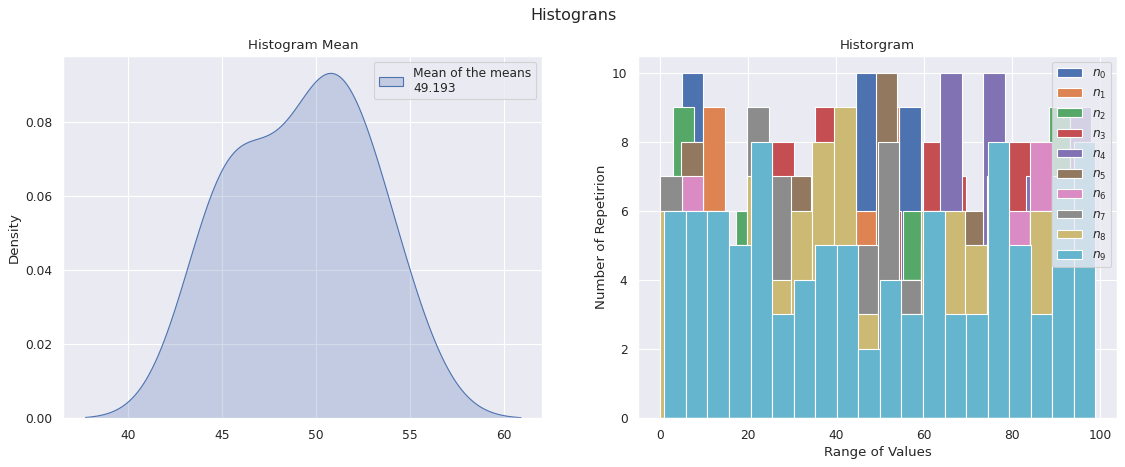

In [ ]:
figure(figsize=(17, 6), dpi=80)
plt.suptitle('Histograns')

plt.subplot(1,2,1)
hist_mean = []
for i in range(len(samples)):hist_mean.append(np.mean(samples[i]))
fig =sns.kdeplot(hist_mean, shade=True,label='Mean of the means\n'+str(round(np.mean(hist_mean),3)))
plt.title('Histogram Mean')
plt.legend()

plt.subplot(1,2,2)
for i in range(len(samples)): plt.hist(samples[i], bins=20,label='$n_'+str(i)+'$')
plt.title('Historgram')
plt.legend()
plt.xlabel('Range of Values')
plt.ylabel('Number of Repetirion')
plt.show()

In [ ]:
colors = ['c'+str(i) for i in range(len(samples))]

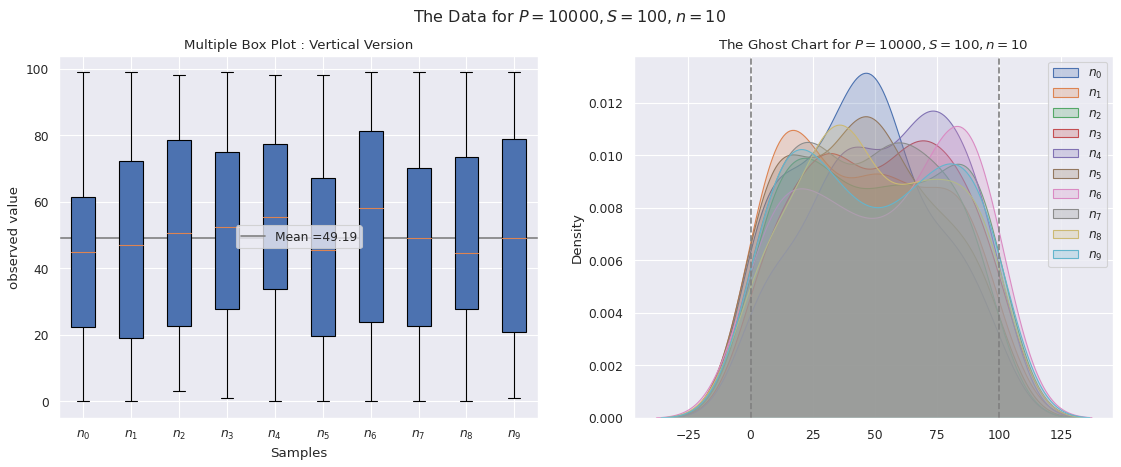

In [ ]:


figure(figsize=(17, 6), dpi=80)
plt.suptitle('The Data for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')
all_data = [samples[i] for i in range(len(samples))]
labels = ['$n_'+str(i)+'$' for i in range(len(samples))]
colors = ['c'+str(i) for i in range(len(samples))]
#MultipleBoxplot
plt.subplot(1,2,1)
plt.boxplot(all_data, vert=True, patch_artist=True, labels=labels)
plt.axhline(y=np.mean(hist_mean), color='gray',label='Mean ='+str(round(np.mean(hist_mean),2)),zorder=1)
plt.ylabel('observed value')
plt.xlabel('Samples')
plt.title('Multiple Box Plot : Vertical Version')
plt.legend()

plt.subplot(1,2,2)
for i in range(len(samples)): fig = sns.kdeplot(samples[i], shade=True,label='$n_'+str(i)+'$')
plt.axvline(x=0, color='gray',linestyle='--')
plt.axvline(x=100, color='gray',linestyle='--')
plt.legend()
plt.title('The Ghost Chart for $P='+str(P)+', S='+str(S)+', n='+str(n)+'$')

plt.show()

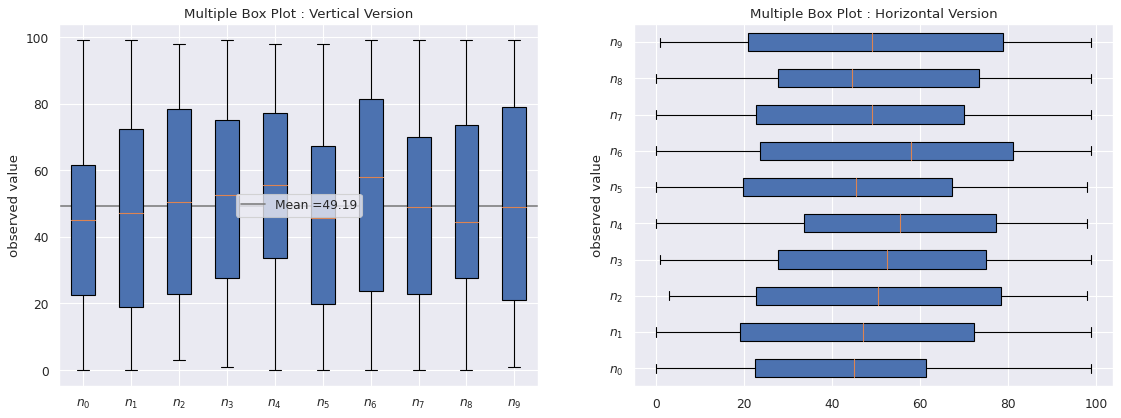

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

figure(figsize=(17, 6), dpi=80)
all_data = [samples[i] for i in range(len(samples))]
labels = ['$n_'+str(i)+'$' for i in range(len(samples))]
#MultipleBoxplot
plt.subplot(1,2,1)
plt.boxplot(all_data, vert=True, patch_artist=True, labels=labels)
plt.axhline(y=np.mean(hist_mean), color='gray',label='Mean ='+str(round(np.mean(hist_mean),2)),zorder=1)
plt.ylabel('observed value')
plt.title('Multiple Box Plot : Vertical Version')
plt.legend()

plt.subplot(1,2,2)
plt.boxplot(all_data, vert=False, patch_artist=True, labels=labels) 
plt.ylabel('observed value')
plt.title('Multiple Box Plot : Horizontal Version')  


plt.show()

# COMBINATIONS

Combinations of a list of numbers
 
$$
{\displaystyle C_{s}^{n}={\frac {n!}{s!\cdot \left(n-s\right)!}}}
$$

In [8]:
# A Python program to print all
# combinations of given length
from itertools import combinations
import numpy as np
# Get all combinations of [1, 2, 3]
# and length 2
tam = 3

combi = np.arange(0,tam)
def comb(lista):
   return tamanho.append(combinations(lista, 2))
tamanho = []


#Print the obtained combinations
for i in range(0,10)
    print (i)

for i in range()

# An Exemple

“Uma amostra de 25 adultos do sexo masculino em uma cidade mostrou que
o nível de colesterol tem média 186 e desvio padrão 12. Considerando que
nessa cidade o nível de colesterol da população de adultos do sexo masculino
segue uma normal, obter o intervalo de confiança de 95% para a média”


The 

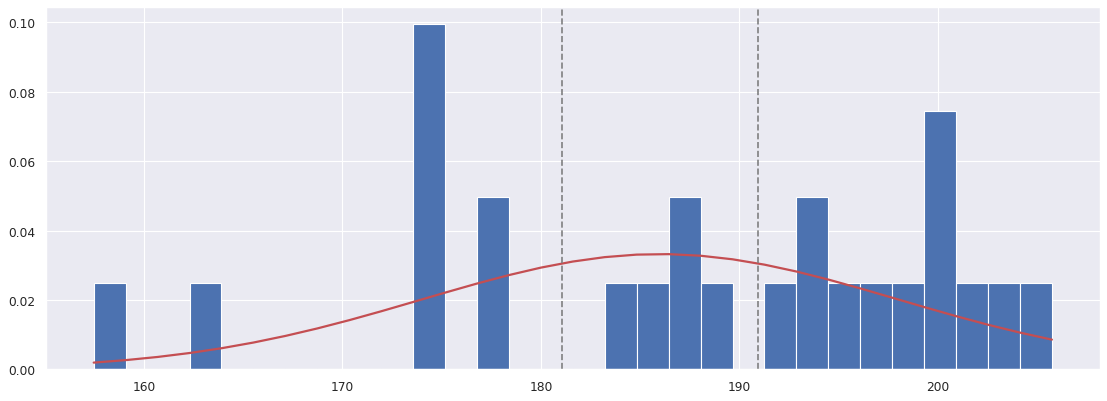

In [52]:
import numpy as np 
from scipy.stats import t

mu, sigma = 186, 12 # mean and standard deviation

s = np.random.normal(mu, sigma, 25)


dof = len(s)-1 
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
a = (mu-sigma*t_crit/np.sqrt(len(s)), mu+sigma*t_crit/np.sqrt(len(s)))


import matplotlib.pyplot as plt
#Ploting
figure(figsize=(17, 6), dpi=80)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

plt.axvline(x=a[0], color='gray',linestyle='--')
plt.axvline(x=a[1], color='gray',linestyle='--')

plt.show()


In [49]:
from scipy.stats import norm
from scipy import stats
import math


dados = np.random.normal(loc = 186, scale = 12, size=25)
n = len(dados)
media = np.mean(dados)
desvio_padrao = np.std(dados)

stats.sem(dados)
desvio_padrao / math.sqrt(n - 1)
intervalos = norm.interval(0.95, media, stats.sem(dados))
margem_erro = media - intervalos[0]

intervalos

(182.2707959934202, 190.16378200425643)

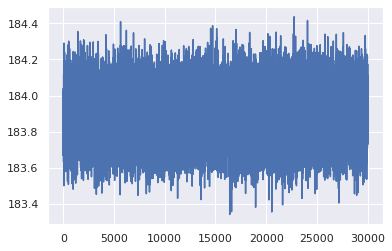

In [36]:
values = [np.random.choice(s,size=len(s),replace=True).mean() for i in range(1000)] 

np.percentile(values,[100*(1-confidence)/2,100*(1-(1-confidence)/2)]) 

array([185.93400039, 186.20592003])

# REFERENCES 

* https://www.includehelp.com/python/multiple-box-plot-in-python-using-matplotlib.aspx

* https://www.omniconvert.com/what-is/sample-size/

* https://towardsdatascience.com/how-to-calculate-confidence-intervals-in-python-a8625a48e62b